# CSE-221710309053-Hari Sarmishta

## Question:
For the same cats vs dog image classifier.
* Build two different CNN models. 
* Compile them with your choice of optimizer and loss.
* Fit the model with the Train and validation generators
* Check for the overfitting and underfitting.  


In [1]:

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-13 08:41:23--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   162MB/s    in 0.4s    

2020-07-13 08:41:24 (162 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile
local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
os.listdir('/tmp/cats_and_dogs_filtered')

['train', 'vectorize.py', 'validation']

In [4]:
os.listdir('/tmp/cats_and_dogs_filtered/train')

['dogs', 'cats']

In [5]:
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/dogs')))
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/cats')))

1000
1000


In [6]:
base_dir='/tmp/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

train_dogs_dir=os.path.join(train_dir,'dogs')
train_cats_dir=os.path.join(train_dir,'cats')

val_dogs_dir=os.path.join(validation_dir,'dogs')
val_cats_dir=os.path.join(validation_dir,'cats')

In [7]:
train_cats_filenames=os.listdir(train_cats_dir)
train_cats_filenames[:4]

['cat.955.jpg', 'cat.776.jpg', 'cat.914.jpg', 'cat.467.jpg']

In [8]:
train_cats_filenames=os.listdir(train_cats_dir)
train_cats_filenames[:4]

['cat.955.jpg', 'cat.776.jpg', 'cat.914.jpg', 'cat.467.jpg']

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

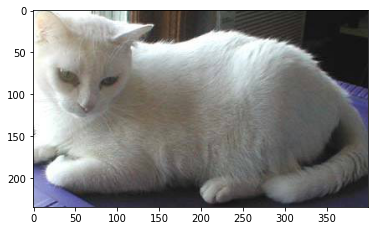

In [11]:
plt.imshow(plt.imread(os.path.join(train_cats_dir,train_cats_filenames[0])))

In [12]:
import random

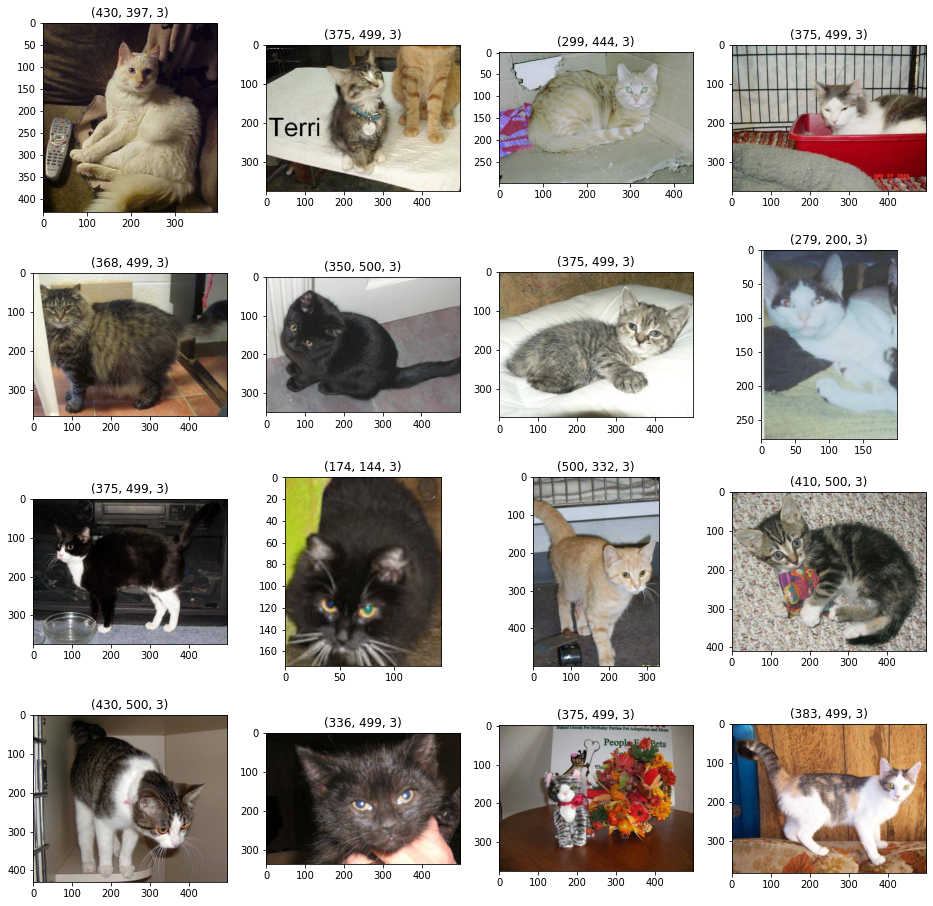

In [13]:
images=[]
plt.figure(figsize=(16,16))
for i in range(16):
  plt.subplot(4,4,i+1)
  imgname=random.choice(train_cats_filenames)
  images.append(imgname)
  img=plt.imread(os.path.join(train_cats_dir,imgname))
  plt.imshow(img)
  plt.title(img.shape)

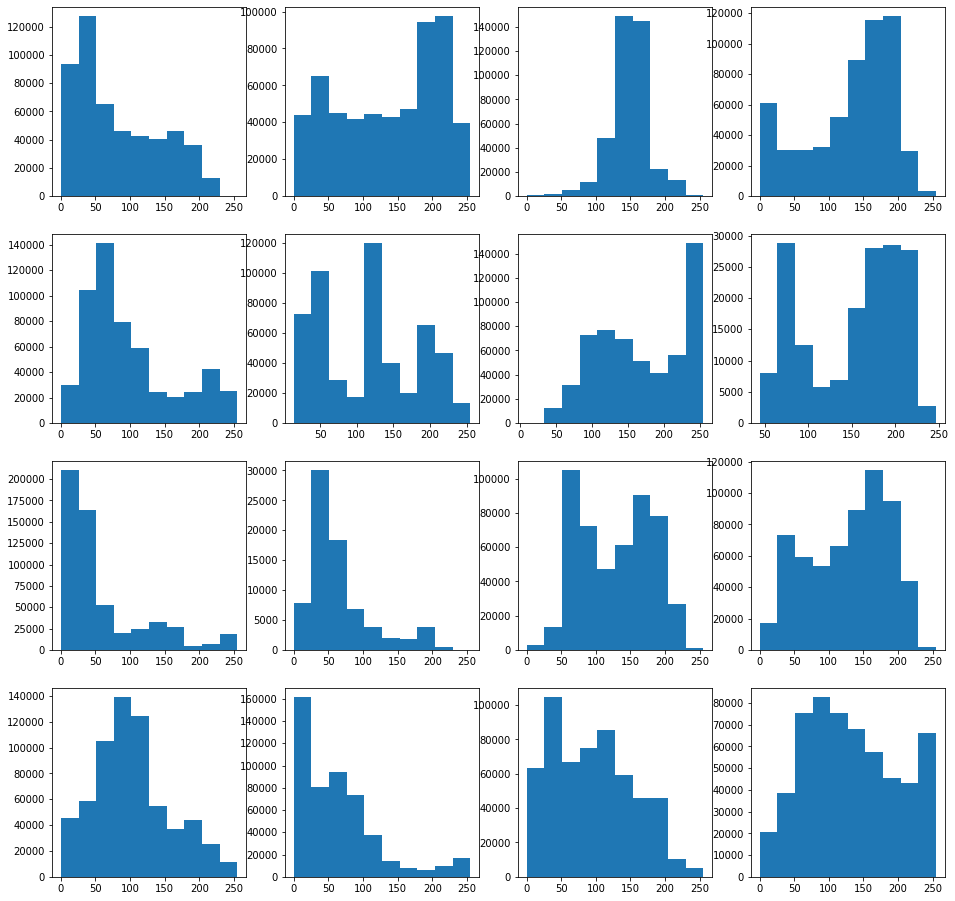

In [14]:
plt.figure(figsize=(16,16))
j=1
for i in images:
  img=plt.imread(os.path.join(train_cats_dir,i))
  plt.subplot(4,4,j)
  plt.hist(img.flat)
  j+=1

In [15]:
train_dogs_filenames=os.listdir(train_dogs_dir)
train_dogs_filenames[:4]

['dog.119.jpg', 'dog.723.jpg', 'dog.1.jpg', 'dog.638.jpg']

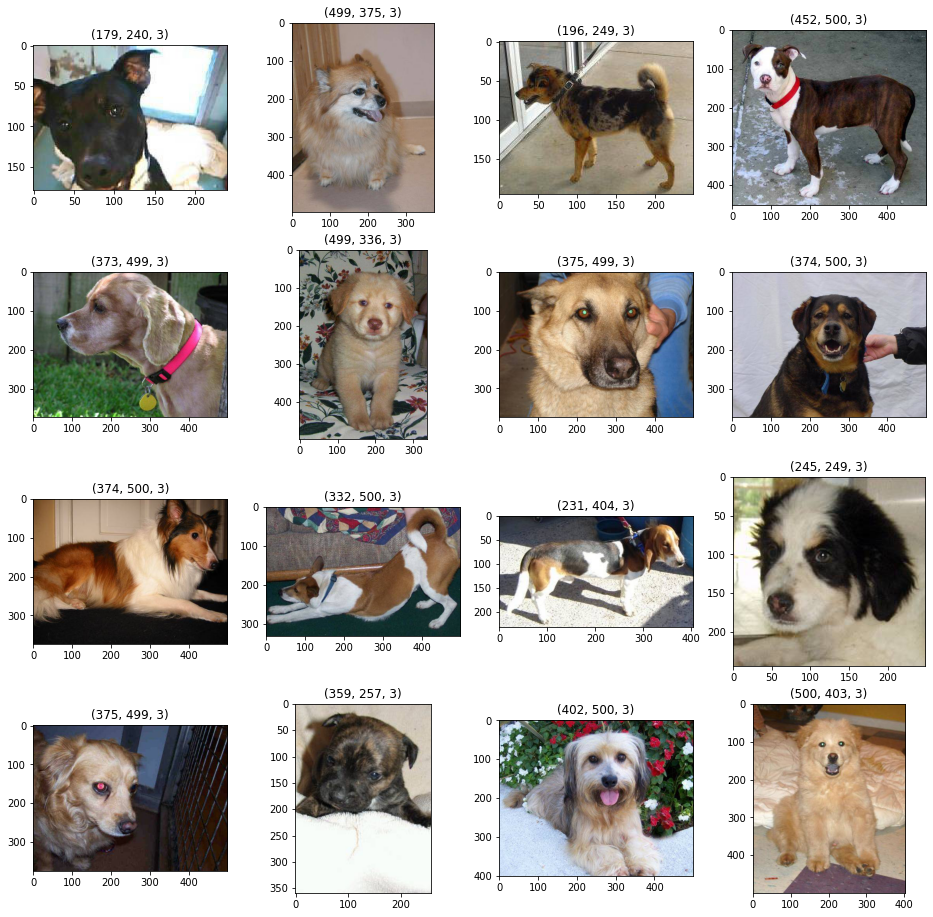

In [16]:
dogs_images=[]
plt.figure(figsize=(16,16))
for i in range(16):
  plt.subplot(4,4,i+1)
  imgname=random.choice(train_dogs_filenames)
  dogs_images.append(imgname)
  img=plt.imread(os.path.join(train_dogs_dir,imgname))
  plt.imshow(img)
  plt.title(img.shape)

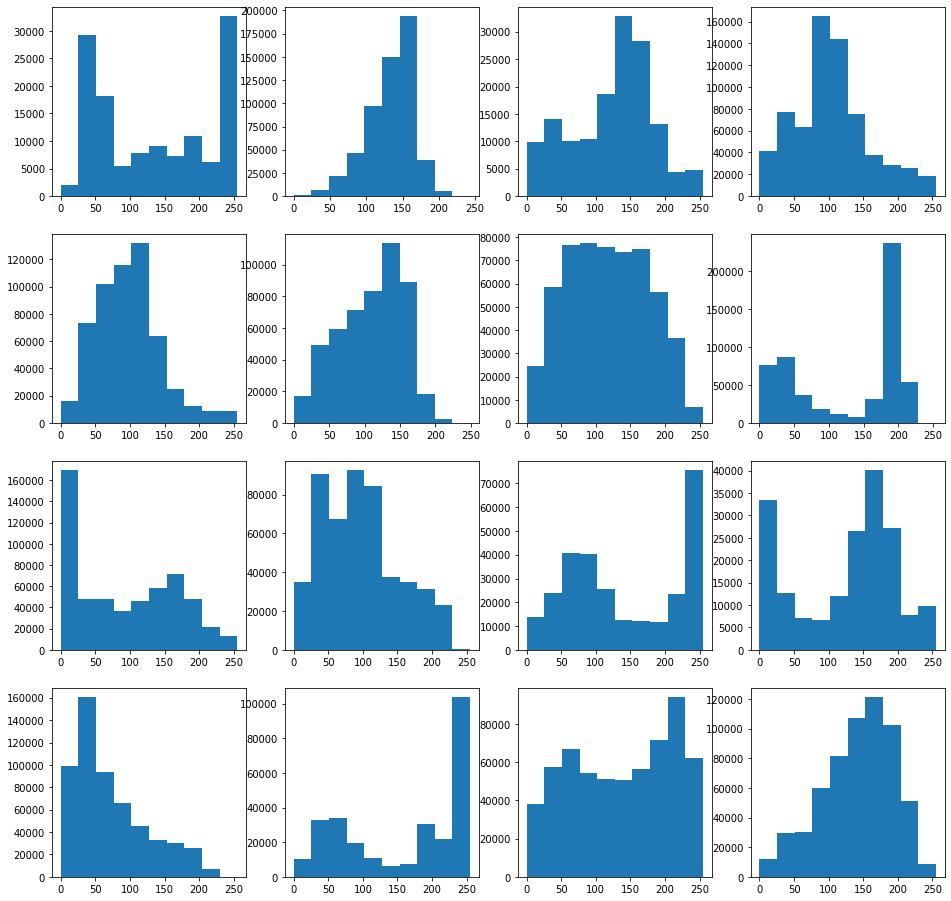

In [17]:
plt.figure(figsize=(16,16))
j=1
for i in dogs_images:
  img=plt.imread(os.path.join(train_dogs_dir,i))
  plt.subplot(4,4,j)
  plt.hist(img.flat)
  j+=1

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

validation_generator = val_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
img,labels=train_generator.next()
print(img.shape)
print(labels.shape)

(20, 150, 150, 3)
(20,)


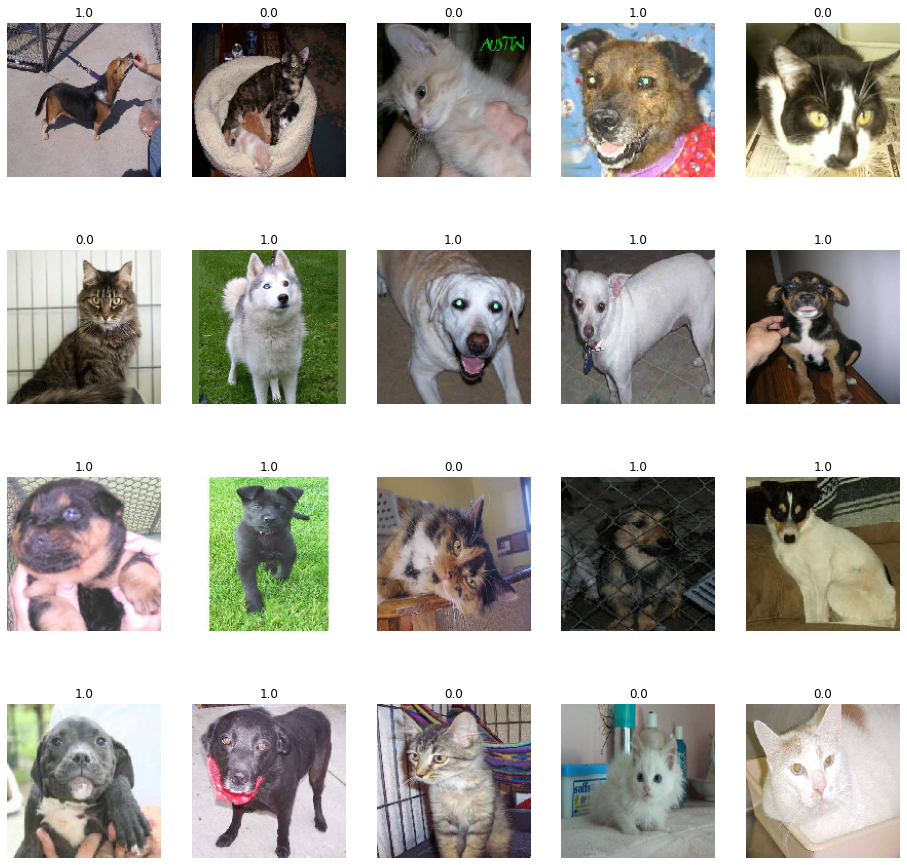

In [20]:
plt.figure(figsize=(16,16))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(img[i,:,:,:])
  plt.title(labels[i])
  plt.axis("off")

In [21]:
## import required methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [22]:
model = Sequential()
## add a conv layer followed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
# Convert the featuremap into 1D  array
model.add(Flatten())
# Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
## Final output layer
model.add(Dense(1,activation='sigmoid'))

#let us see the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [23]:
### Compiling the model
import tensorflow as tf
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [24]:
history=model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
100/100 [==============================] - 62s 621ms/step - loss: 0.7438 - accuracy: 0.5475 - val_loss: 0.6648 - val_accuracy: 0.5560
Epoch 2/15
100/100 [==============================] - 59s 594ms/step - loss: 0.6162 - accuracy: 0.6675 - val_loss: 0.5879 - val_accuracy: 0.6750
Epoch 3/15
100/100 [==============================] - 58s 584ms/step - loss: 0.5472 - accuracy: 0.7275 - val_loss: 0.6059 - val_accuracy: 0.6990
Epoch 4/15
100/100 [==============================] - 57s 569ms/step - loss: 0.4564 - accuracy: 0.7935 - val_loss: 0.7361 - val_accuracy: 0.6730
Epoch 5/15
100/100 [==============================] - 59s 593ms/step - loss: 0.3870 - accuracy: 0.8235 - val_loss: 0.6674 - val_accuracy: 0.6740
Epoch 6/15
100/100 [==============================] - 58s 583ms/step - loss: 0.3249 - accuracy: 0.8555 - val_loss: 0.6278 - val_accuracy: 0.7090
Epoch 7/15
100/100 [==============================] - 58s 578ms/step - loss: 0.2266 - accuracy: 0.9065 - val_loss: 0.6807 - val_ac

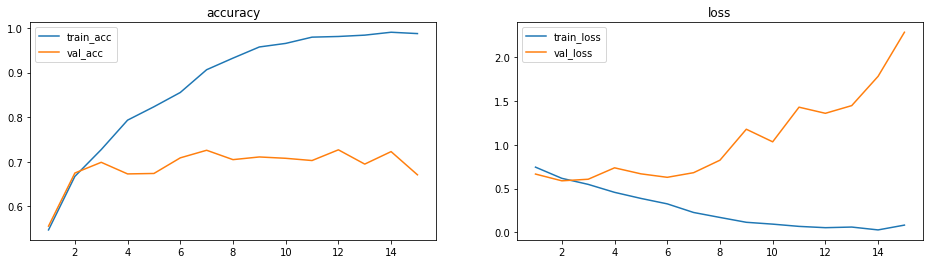

In [25]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,16))
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()

## With another model

In [26]:
model1 = Sequential()
## add a conv layer followed by maxpooling
model1.add(Conv2D(128,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model1.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model1.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model1.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
# Convert the featuremap into 1D  array
model1.add(Flatten())
# Fully connected layer with 512 neurons
model1.add(Dense(512,activation='relu'))
## Final output layer
model1.add(Dense(1,activation='softmax'))

#let us see the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [27]:
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [28]:
history1=model.fit(train_generator,epochs=7,validation_data=validation_generator,batch_size=32)

Epoch 1/7
100/100 [==============================] - 62s 616ms/step - loss: 0.0348 - accuracy: 0.9910 - val_loss: 1.9758 - val_accuracy: 0.7220
Epoch 2/7
100/100 [==============================] - 61s 612ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 1.9348 - val_accuracy: 0.6790
Epoch 3/7
100/100 [==============================] - 61s 612ms/step - loss: 0.0332 - accuracy: 0.9940 - val_loss: 2.0050 - val_accuracy: 0.7120
Epoch 4/7
100/100 [==============================] - 61s 608ms/step - loss: 0.0502 - accuracy: 0.9940 - val_loss: 2.0974 - val_accuracy: 0.7130
Epoch 5/7
100/100 [==============================] - 60s 598ms/step - loss: 0.0439 - accuracy: 0.9940 - val_loss: 2.5579 - val_accuracy: 0.7100
Epoch 6/7
100/100 [==============================] - 58s 581ms/step - loss: 0.0330 - accuracy: 0.9940 - val_loss: 2.1948 - val_accuracy: 0.7120
Epoch 7/7
100/100 [==============================] - 58s 576ms/step - loss: 0.0195 - accuracy: 0.9955 - val_loss: 3.3178 - val_accuracy:

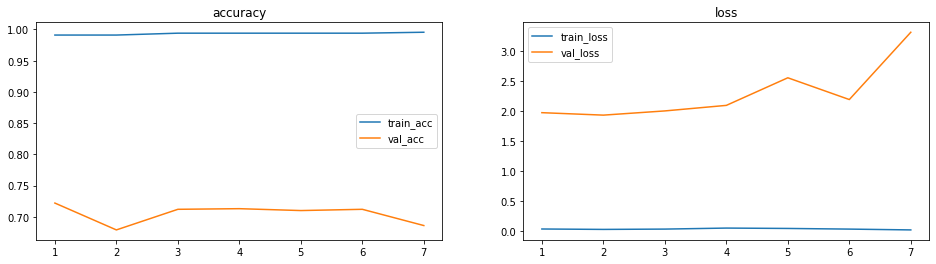

In [29]:
train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = list(range(1,8))
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()

##### My 2nd model has overfitting issue

